## Homework - week 5 (20pts)

This week we will continue with applying the statistical concepts and tools we're learning about to real data.

As always please be sure to include the following in your responses to each part:
* **Labels:** label axis on plots, include legends when multiple things are plotted on the same plot, and include text to define what is being printed to the screen when giving numerical answers.
* **Presentation:** Make sure all cells execute as you intend. Make sure you are plotting or printing to the screen the relevant information to answer the question or perform the task.

### Part 0: In-lab - include the work from lab at the start of your homework notebook (5pts)
**We will be comparing the data you looked at during lab with other data. Including the lab work in this notebook will also make it easier to continue with the parts of the homework that involve making comparisons.**
**NOTE:** Be sure to give each set of data unique variable names.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv(r'C:/Users/ahanks/class_data/E11/D3S_10s.csv')
data1

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.4071,0.4072,0.4073,0.4074,0.4075,0.4076,0.4077,0.4078,0.4079,0.4080
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data1_array = np.array(data1)
print(data1_array)
print(data1_array.shape)
counts1 = data1_array.sum(axis=1)
print(len(counts1))
print(counts1)

[[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]]
(6247, 4096)
6247
[105  94 119 ...  93  90 102]


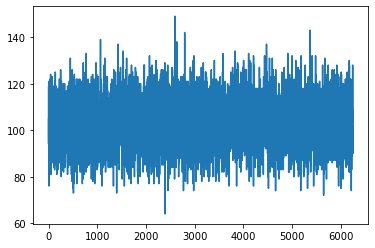

In [6]:
plt.plot(counts1)
plt.show()

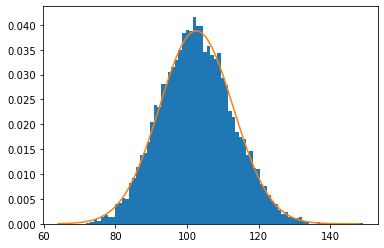

In [7]:
min_counts = np.min(counts1)
max_counts = np.max(counts1)
nbins = max_counts - min_counts + 1
plt.hist(counts1,bins=nbins, density=True)

from scipy.stats import norm
mean = np.mean(counts1)
sigma = np.std(counts1)
x = np.array(range(min_counts,max_counts))
y = norm.pdf(x, mean, sigma)
plt.plot(x,y)
plt.show()

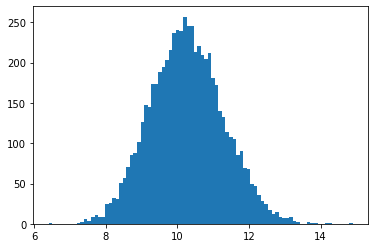

In [8]:
counts1_mean = np.mean(counts1)
counts1_std = np.std(counts1)

# This data is collected over 10 second intervals
# CPS = counts/10s
cps_array = counts1/10
plt.hist(cps_array,bins=nbins)
plt.show()

In [9]:
cps1_mean = counts1_mean/10
print(cps1_mean)
print(np.mean(cps_array))

cps1_std = counts1_std/10
print(cps1_std)
print(np.std(cps_array))

10.257419561389467
10.257419561389469
1.0279364621173859
1.0279364621173859


In [10]:
counts1_unc = np.sqrt(counts1)
print(np.mean(counts1_unc))
print(counts1_std)

10.115141133158389
10.279364621173858


In [11]:
counts1_mean

102.57419561389467

In [12]:
nsamples = len(counts1)
print(nsamples)
mean1_unc = counts1_std/np.sqrt(nsamples)
print("Mean counts = {} +/- {}".format(counts1_mean,mean1_unc))

6247
Mean counts = 102.57419561389467 +/- 0.13005603760459136


In [13]:
cps1_mean_unc = cps1_std/np.sqrt(nsamples)
print("Mean cps = {} +/- {}".format(cps1_mean,cps1_mean_unc))

Mean cps = 10.257419561389467 +/- 0.013005603760459136


In [14]:
total_counts1 = counts1.sum()
print(total_counts1)
print(counts1_mean*nsamples)

640781
640781.0


In [15]:
total_cps = total_counts1/(nsamples*10)
total_cps_unc = np.sqrt(total_counts1)/(nsamples*10)
print("Total cps =",total_cps,"+/-",total_cps_unc)

Total cps = 10.257419561389467 +/- 0.012813958318785549


In [16]:
print("Mean cps = {} +/- {}".format(cps1_mean,cps1_mean_unc))

Mean cps = 10.257419561389467 +/- 0.013005603760459136


In [17]:
eff = 0.05

A1 = cps1_mean/eff
print(A1)

205.14839122778932


In [18]:
cps1_rel_unc = cps1_mean_unc/cps1_mean
eff_rel_unc = .1

A1_rel_unc = np.sqrt(cps1_rel_unc**2 + eff_rel_unc**2)
print("Activity = {} +/- {}%".format(A1,A1_rel_unc))

Activity = 205.14839122778932 +/- 0.10000803780281112%


Part 2 of lab activity:

In [20]:
data_etch = pd.read_csv(r"C:/Users/ahanks/class_data/E11/etch_roof.csv")

In [21]:
time_mask = data_etch['deviceTime_local']>'2020-08-17 00:00:00:-07:00'
etch_cut = data_etch[time_mask]

times = etch_cut.deviceTime_unix
etch_cut

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
321523,2020-08-17 07:00:51+0000,2020-08-17 00:00:51-0700,1.597648e+09,2.0,0.632456,0.0
321524,2020-08-17 07:05:51+0000,2020-08-17 00:05:51-0700,1.597648e+09,3.4,0.824621,0.0
321525,2020-08-17 07:10:51+0000,2020-08-17 00:10:51-0700,1.597648e+09,2.8,0.748331,0.0
321526,2020-08-17 07:15:51+0000,2020-08-17 00:15:51-0700,1.597649e+09,1.8,0.600000,0.0
321527,2020-08-17 07:20:51+0000,2020-08-17 00:20:51-0700,1.597649e+09,3.0,0.774597,0.0
...,...,...,...,...,...,...
330557,2020-09-17 19:00:42+0000,2020-09-17 12:00:42-0700,1.600369e+09,3.2,0.800000,0.0
330558,2020-09-17 19:05:42+0000,2020-09-17 12:05:42-0700,1.600370e+09,1.6,0.565685,0.0
330559,2020-09-17 19:10:42+0000,2020-09-17 12:10:42-0700,1.600370e+09,2.0,0.632456,0.0
330560,2020-09-17 19:15:42+0000,2020-09-17 12:15:42-0700,1.600370e+09,3.8,0.871780,0.0


In [22]:
etch_array = np.array(etch_cut.cpm)*5
print(etch_array)
print(times)

[10. 17. 14. ... 10. 19.  7.]
321523    1.597648e+09
321524    1.597648e+09
321525    1.597648e+09
321526    1.597649e+09
321527    1.597649e+09
              ...     
330557    1.600369e+09
330558    1.600370e+09
330559    1.600370e+09
330560    1.600370e+09
330561    1.600370e+09
Name: deviceTime_unix, Length: 9039, dtype: float64


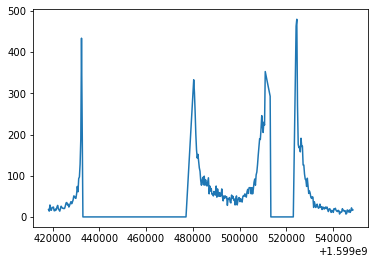

In [23]:
plt.plot(times[5900:6300],etch_array[5900:6300])
plt.show()

In [25]:
new_time_mask = (etch_cut['deviceTime_unix']>np.array(times)[5900]) & (etch_cut.deviceTime_unix<np.array(times)[6300])
etch_cut2 = etch_cut[~new_time_mask]
etch_array2 = np.array(etch_cut2.cpm)*5
etch_array2

array([10., 17., 14., ..., 10., 19.,  7.])

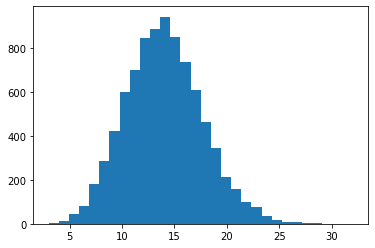

In [26]:
nbins = int(np.max(etch_array2)) - int(np.min(etch_array2)) + 1
plt.hist(etch_array2,bins=nbins)
plt.show()

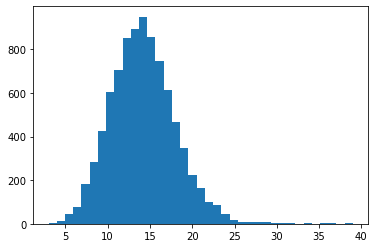

In [27]:
etch_clean = etch_array[(etch_array<40) & (etch_array>0)]
nbins = int(np.max(etch_clean)) - int(np.min(etch_clean)) + 1
plt.hist(etch_clean,bins=nbins)
plt.show()

In [28]:
from scipy import stats

In [29]:
stats.ttest_ind(counts1,etch_clean, equal_var=False)

Ttest_indResult(statistic=648.1031195484316, pvalue=0.0)

### Part 1: Looking at data collected in our lab (10pts)

Here we will be following most of the same steps we took during lab when working with the 10s interval data, but for this 2s interval data instead. The last few steps will involve comparisons.

#### 1.a Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1.b Import example data

This is data collected from our radiation detector that collects counts as a function of energy. In this case we are looking at data collected in 2 second intervals.

Data is on CoCalc:

File name: *D3S_2s.csv*
* located in the data sub-folder: `/home/user/data`

For local download from CoCalc to Downloads or similar and import as follows:
`data2 = pd.read_csv("~/Downloads/D3S_2s.csv")`


In [30]:
data2 = pd.read_csv(r'C:/Users/ahanks/class_data/E11/D3S_2s.csv')
data2

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.4073,0.4074,0.4075,0.4076,0.4077,0.4078,0.4079,0.4080,0.4081,0.4082
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 1.c Sum each row across columns to get an array of the counts measured in each 10s interval
Note: this was a typo, I meant measured in each 2s interval.

In [31]:
data2_array = np.array(data2)
counts2 = data2_array.sum(axis=1)

#### 1.d Plot the time series of these counts - counts vs time (index) - and the frequency histogram

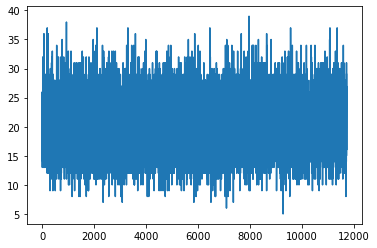

In [32]:
plt.plot(counts2)
plt.show()

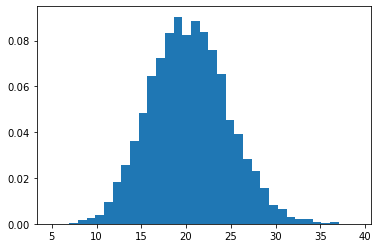

In [35]:
min_counts = np.min(counts2)
max_counts = np.max(counts2)
nbins = max_counts - min_counts + 1
plt.hist(counts2,bins=nbins, density=True)
plt.show()

#### 1.e. Calculating properties of these measurements:
* Calculate the mean and standard deviation of the distribution of counts
* Calculate the mean and standard deviation of the counts-per-second
* What is the uncertainty on the mean in each of these cases?
* Compare this estimate of the CPS mean and the uncertainty on that with what you get through combining all measurements into one and determining the relative uncertainty on that measurement.

In [38]:
counts2_mean = np.mean(counts2)
counts2_std = np.std(counts2)
print("Mean counts = {}, standard div. = {}".format(counts2_mean,counts2_std))
cps2_mean = counts2_mean/2
cps2_std = counts2_std/2
print("Mean cps = {}, standard div. = {}".format(cps2_mean,cps2_std))
counts2_mean_unc = counts2_std/np.sqrt(len(counts2))
print("Mean counts uncertainty = {}".format(counts2_mean_unc))
cps2_mean_unc = counts2_mean_unc/2
print("Mean cps uncertainty = {}".format(cps2_mean_unc))

Mean counts = 20.29889865960898, standard div. = 4.511239422034201
Mean cps = 10.14944932980449, standard div. = 2.2556197110171006
Mean counts uncertainty = 0.041683272265907505
Mean cps uncertainty = 0.020841636132953752


#### 1.f Based on the efficiency defined below determine the Activity for the radiation source this data is measuring - include uncertainties.

Detector efficiency:
* eff = 0.05 with 10% uncertainty
  * eff - the probability of radiation from a radioactive decay interacting in our detector
* What is the propagated uncertainty on the activity of the source being measured by this detector?


In [39]:
eff = 0.05

A2 = cps2_mean/eff

cps2_rel_unc = cps2_mean_unc/cps2_mean
eff_rel_unc = .1

A2_rel_unc = np.sqrt(cps2_rel_unc**2 + eff_rel_unc**2)
print("Activity = {} +/- {}%".format(A2,A2_rel_unc))

Activity = 202.9889865960898 +/- 0.10002108156695606%


#### 1.g Plot the distribution of counts from this data together with the data we looked at in class (the 10s interval data)
* How do these distributions compare (the means and standard deviations)

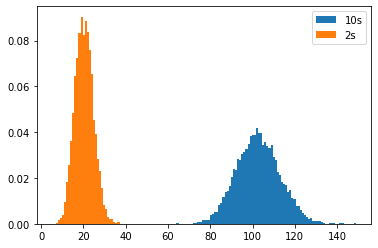

In [41]:
min_counts = np.min(counts1)
max_counts = np.max(counts1)
nbins1 = max_counts - min_counts + 1
plt.hist(counts1,bins=nbins1, density=True, label="10s")

min_counts = np.min(counts2)
max_counts = np.max(counts2)
nbins2 = max_counts - min_counts + 1
plt.hist(counts2,bins=nbins2, density=True, label="2s")

plt.legend()
plt.show()

#### 1.h Plot the CPS distributions for both sets of data - how do these compare?

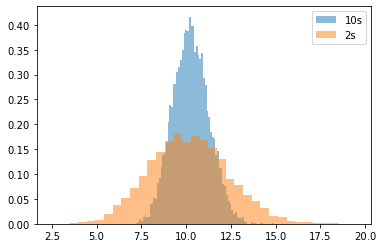

In [46]:
cps1_array = counts1/10
plt.hist(cps1_array,bins=nbins1, density=True, alpha=0.5, label="10s")

cps2_array = counts2/2
plt.hist(cps2_array,bins=nbins2, density=True, alpha=0.5, label="2s")

plt.legend()
plt.show()

#### 1.i How do the CPS and Activities you get here compare to what you got during lab for the 10s interval data?

Do the results agree based on the propagated uncertainties. Here you can simply discuss the probability that the two measurements are of the same source by comparing your results and their uncertainties.

In [48]:
print("Activity (10s data) = {} +/- {}%".format(A1,A1_rel_unc))
print("Activity (2s data)= {} +/- {}%".format(A2,A2_rel_unc))

print("Activity (10s data) = {} +/- {}".format(A1,A1_rel_unc*A1))
print("Activity (2s data)= {} +/- {}".format(A2,A2_rel_unc*A2))


Activity (10s data) = 205.14839122778932 +/- 0.10000803780281112%
Activity (2s data)= 202.9889865960898 +/- 0.10002108156695606%
Activity (10s data) = 205.14839122778932 +/- 20.516488065094638
Activity (2s data)= 202.9889865960898 +/- 20.30317798552125


These activities look close. Assuming the efficiencies are independent, the uncertianties in each case are much larger than the difference in the means, meaning the activities are the same.

As a side note, if this was the same detector taking data at different times this would mean that the uncertainty in the efficiency is not independent for both measurements. This would mean that the applicable uncertainties for comparing the Activities in both cases would only be the uncertainties from the measurements: 0.516 and 0.303. In that case the two measurements are not in statistical agreement.

### Part 2: Looking at data collected over time at various locations (5pts)

Here we will import data from one of the locations that provides data through the RadWatch website that we can download. I have uploaded data from Pinewood to CoCalc in a file named: `pinewood.csv`

You can import this on CoCalc, or download this and import locally in this way (for example - will depend on where you put the downloaded data locally):

`data_pinewood = pd.read_csv('~/Downloads/pinewood.csv')`

#### 2.a Load the data and check the time series of this data to identify outliers

Follow what we did during lab for the etcheverry data to verify the quality of the data.

In [50]:
data_pinewood = pd.read_csv(r"C:/Users/ahanks/class_data/E11/pinewood.csv")
data_pinewood

,deviceTime_utc,deviceTime_local,deviceTime_unix,cpm,cpmError,error_flag
0,2020-02-25 02:10:13+00:00,2020-02-24 18:10:13-08:00,1.582597e+09,1.2,0.489898,NaN
1,2020-02-25 02:05:23+00:00,2020-02-24 18:05:23-08:00,1.582596e+09,3.2,0.800000,NaN
2,2020-02-25 02:05:13+00:00,2020-02-24 18:05:13-08:00,1.582596e+09,1.4,0.529150,NaN
3,2020-02-25 02:00:24+00:00,2020-02-24 18:00:24-08:00,1.582596e+09,0.6,0.346410,NaN
4,2020-02-25 02:00:13+00:00,2020-02-24 18:00:13-08:00,1.582596e+09,0.8,0.400000,NaN
...,...,...,...,...,...,...
424155,2020-09-22 10:00:13+0000,2020-09-22 03:00:13-0700,1.600769e+09,1.4,0.529150,0.0
424156,2020-09-22 10:05:13+0000,2020-09-22 03:05:13-0700,1.600769e+09,1.6,0.565685,0.0
424157,2020-09-22 10:10:13+0000,2020-09-22 03:10:13-0700,1.600769e+09,1.8,0.600000,0.0
424158,2020-09-22 10:15:13+0000,2020-09-22 03:15:13-0700,1.600770e+09,1.6,0.565685,0.0


In [60]:
time_mask = data_pinewood['deviceTime_local']>'2020-08-17 00:00:00:-07:00'
pinewood_cut = data_pinewood[time_mask]

pinewood_times = pinewood_cut.deviceTime_unix
pinewood_counts = np.array(pinewood_cut.cpm)*5

#### 2.b. Plot the frequency distribution (histogram) for this data as counts (rather than CPM)

**NOTE:** The data is collected in 5 minute intervals and the values available in the data you load is counts-per-minute.

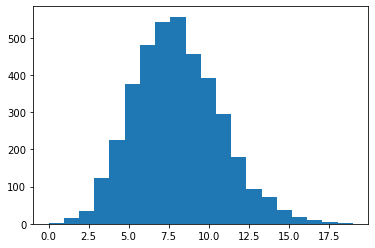

In [61]:
nbins_p = int(np.max(pinewood_counts)) - int(np.min(pinewood_counts)) + 1

plt.hist(pinewood_counts, bins=nbins_p)
plt.show()

#### 2.c. Plot this data together with the Etcheverry data we looked at during lab (after removing all outliers)

* How do these two sets of data compare?

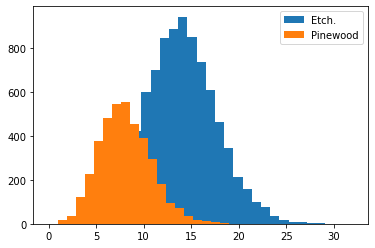

In [63]:
nbins_e = int(np.max(etch_array2)) - int(np.min(etch_array2)) + 1
plt.hist(etch_array2,bins=nbins_e, label="Etch.")

plt.hist(pinewood_counts,bins=nbins_p, label="Pinewood")

plt.legend()
plt.show()

#### 2.d Are these two sets of data in statistical agreement?

* These are both measuring ambient background radiation. Is the level of background radiation the same (statistically) in both locations?
* If so, is this surprising?
* If not, is the observed statistically significant difference large in an absolute sense - meaning is this indicating an important difference in levels of radiation?

In [66]:
tstat,pvalue = stats.ttest_ind(pinewood_counts,etch_array2, equal_var=False)
print("Probability that these data sets are sampling the same distribution =",pvalue)

print("Etch mean = {}, Pinewood mean = {}".format(np.mean(etch_array2),np.mean(pinewood_counts)))

Probability that these data sets are sampling the same distribution = 0.0
Etch mean = 13.898148148148149, Pinewood mean = 7.959683592753254


This time I used the t-test to determine if these are sampling the same underlying radiation level. The result shows that these two locations do have radiation levels that are statistically distinct. The distributions themselves do look very distinct, so this is not surprising.

The difference is close to a factor of two, but background radiations levels can vary by more than a factor of 10.